<a href="https://colab.research.google.com/github/kanakkhaitan/ml-project-from-scratch/blob/main/7th_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
import opendatasets as od

In [ ]:
data_url='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kanakkhaitan
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:11<00:00, 152MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [ ]:
data_dir='./new-york-city-taxi-fare-prediction'

In [ ]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 May 22 05:07 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K May 22 05:07 sample_submission.csv
-rw-r--r-- 1 root root 960K May 22 05:07 test.csv
-rw-r--r-- 1 root root 5.4G May 22 05:08 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [ ]:
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


In [ ]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [ ]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [ ]:
import pandas as pd

In [ ]:

sample_fraction=0.01

In [ ]:
selected_cols='fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [ ]:
import random
random.random()


0.3534349624146764

In [ ]:
dtypes={
    'fare_amount':'float32',
 'pickup_datetime':'float32',
 'pickup_latitude':'float32',
 'dropoff_longitude':'float32',
 'dropoff_latitude':'float32',
 'passenger_count':'uint8'
}

def skip_row(row_idx):
  if(row_idx==0):
     return False
  return random.random()>sample_fraction

random.seed(42)
df=pd.read_csv(data_dir+'/train.csv',
               usecols=selected_cols,
               dtype=dtypes,
               parse_dates=['pickup_datetime'],
               skiprows=skip_row)
#paresedates->to automatically convert a column to datetime format when loading a CSV file.

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979815,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982432,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959060,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992528,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012113,40.706635,-73.988724,40.756218,1


In [ ]:
test_df=pd.read_csv(data_dir+'/test.csv',dtype=dtypes,parse_dates=['pickup_datetime'])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float64            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), uint8(1)
memory usage: 17.4 MB


In [ ]:
df.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497069,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.618246,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362843,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992023,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981816,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967159,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209360,404.983337,2467.752686,3351.403076,208.000000


In [ ]:
df.pickup_datetime.min(),df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [ ]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(3), float64(1), object(1), uint8(1)
memory usage: 358.3+ KB


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033542,0.039093,0.035436,1.278747
min,-74.252193,40.573143,-74.263245,40.568974,1.000000
25%,-73.992501,40.736125,-73.991249,40.735253,1.000000
50%,-73.982326,40.753052,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964062,40.768757,2.000000
max,-72.986532,41.709557,-72.990967,41.696682,6.000000


In [ ]:
test_df.pickup_datetime.min(),test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,val_df=train_test_split(df,test_size=.2,random_state=42)
len(train_df),len(val_df)

(441960, 110490)

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [ ]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col='fare_amount'

In [ ]:
train_inputs=train_df[input_cols]
train_targets=train_df[target_col]

In [ ]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993808,40.724579,-73.993805,40.724579,1
372609,-73.959163,40.780750,-73.969116,40.761230,1
550895,-73.952190,40.783951,-73.978645,40.772602,1
444151,-73.977113,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987155,40.750633,-73.979073,40.763168,1
259178,-73.972653,40.764042,-74.013176,40.707840,2
365838,-73.991980,40.749767,-73.989845,40.720551,3
131932,-73.969058,40.761398,-73.990814,40.751328,1


In [ ]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [ ]:
val_inputs=val_df[input_cols]
val_targets=val_df[target_col]

In [ ]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977388,40.738335,-73.976143,40.751205,1
515867,-73.983907,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968570,40.761238,-73.983406,40.750019,3
19482,-73.986722,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980058,40.760334,-73.872589,40.774300,1


In [ ]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [ ]:
test_inputs=test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751259,-73.979652,40.746140,1
3,-73.981160,40.767807,-73.990448,40.751637,1
4,-73.966046,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
import numpy as np
class MeanRegressor:
    def fit(self,inputs,targets):
      self.mean=targets.mean()

    def predict(self,inputs):
      return np.full(inputs.shape[0],self.mean)

In [ ]:
train_inputs.shape

(441960, 5)

In [ ]:
train_inputs.shape[0]

441960

In [ ]:
np.full(10,3)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
mean_model=MeanRegressor()
mean_model.fit(train_inputs,train_targets)

In [ ]:
mean_model.mean

np.float32(11.354714)

In [ ]:
train_preds=mean_model.predict(train_inputs)
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [ ]:
val_preds=mean_model.predict(val_inputs)
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#we can also write
#def rmse(targets,preds):
#   return mean_squared_error(targets,preds,squared=False)
#and then use rmse only

In [ ]:
train_mse=mean_squared_error(train_targets,train_preds)
train_rmse=np.sqrt(train_mse)
train_rmse

np.float64(9.789781840838485)

In [ ]:
val_mse=mean_squared_error(val_targets,val_preds)
val_rmse=np.sqrt(val_mse)
val_rmse

np.float64(9.89995425435296)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [ ]:
linear_model.fit(train_inputs,train_targets)

LinearRegression()

In [ ]:
train_preds=linear_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460948, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [ ]:
val_preds=linear_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449939,
       11.28443343, 11.28413233])

In [ ]:
train_mse=mean_squared_error(train_targets,train_preds)
train_rmse=np.sqrt(train_mse)
train_rmse


np.float64(9.788632669897789)

In [ ]:
val_mse=mean_squared_error(val_targets,val_preds)
val_rmse=np.sqrt(val_mse)
val_rmse

np.float64(9.898088220636243)

In [ ]:
test_preds=linear_model.predict(test_inputs)
test_preds

array([11.28427953, 11.2846335 , 11.28438382, ..., 11.7212478 ,
       11.72079797, 11.72059354])

In [ ]:
sub_df=pd.read_csv(data_dir+'/sample_submission.csv')
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [ ]:
sub_df['fare_amount']=test_preds
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284049
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721248
9912,2015-01-31 01:05:19.0000005,11.720798


In [ ]:
sub_df.to_csv('linear_model_sunmission.csv',index=None)

In [ ]:
from IPython.display import FileLink


In [ ]:
FileLink('linear_model_submission.csv')
#it is harder to make predictions on larger unseen date(val)than on smaller unseen data

/content/linear_model_submission.csv

In [ ]:
def predict_and_submit(model,test_inputs,fname):
  test_preds=model.predict(test_inputs)
  sub_df=pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount']=test_preds
  sub_df.to_csv(fname,index=None)
  return sub_df

In [ ]:
predict_and_submit(linear_model,test_inputs,'linear_sub2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284049
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721248
9912,2015-01-31 01:05:19.0000005,11.720798


In [ ]:
def add_dateparts(df,col):
  df[col+'_year']=df[col].dt.year
  df[col+'_month']=df[col].dt.month
  df[col+'_day']=df[col].dt.day
  df[col+'_hour']=df[col].dt.hour
  df[col+'_weekday']=df[col].dt.weekday

In [ ]:
add_dateparts(train_df,'pickup_datetime')


In [ ]:
add_dateparts(val_df,'pickup_datetime')

In [ ]:
add_dateparts(test_df,'pickup_datetime')

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_weekday
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,3,6
360070,3.7,2011-01-26 19:21:00+00:00,-73.993808,40.724579,-73.993805,40.724579,1,2011,1,26,19,2
372609,10.0,2012-10-03 10:40:17+00:00,-73.959163,40.780750,-73.969116,40.761230,1,2012,10,3,10,2
550895,8.9,2012-03-14 13:44:27+00:00,-73.952190,40.783951,-73.978645,40.772602,1,2012,3,14,13,2
444151,7.3,2012-02-05 15:33:00+00:00,-73.977113,40.746834,-73.991104,40.750404,2,2012,2,5,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987155,40.750633,-73.979073,40.763168,1,2009,9,6,16,6
259178,18.5,2009-04-12 09:58:56+00:00,-73.972653,40.764042,-74.013176,40.707840,2,2009,4,12,9,6
365838,10.1,2012-07-12 19:30:00+00:00,-73.991980,40.749767,-73.989845,40.720551,3,2012,7,12,19,3
131932,10.9,2011-02-17 18:33:00+00:00,-73.969058,40.761398,-73.990814,40.751328,1,2011,2,17,18,3


In [ ]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [ ]:
def add_trip_distance(df):
  df['trip_distance']=haversine_np(df['pickup_longitude'],
                                 df['pickup_latitude'],
                                 df['dropoff_longitude'],
                                 df['dropoff_latitude'])

In [ ]:
add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)

In [ ]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_weekday,trip_distance
220398,6.5,2011-04-21 07:40:00+00:00,-73.961393,40.765030,-73.985245,40.769493,1,2011,4,21,7,3,2.067669
482641,18.5,2013-04-05 01:31:32+00:00,-73.974284,40.783558,-73.911797,40.767799,1,2013,4,5,1,4,5.542222
375561,6.0,2014-08-14 20:13:00+00:00,-73.982722,40.722923,-73.993538,40.721619,1,2014,8,14,20,3,0.922229
472500,14.5,2014-06-09 08:54:00+00:00,-73.905958,40.772816,-73.886482,40.755379,1,2014,6,9,8,0,2.538214
213693,14.5,2015-02-10 00:34:42+00:00,-73.992149,40.725109,-73.984917,40.769112,6,2015,2,10,0,1,4.927661


In [ ]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [ ]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 65 ms, sys: 0 ns, total: 65 ms
Wall time: 72.2 ms


In [ ]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_weekday,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
336676,8.0,2013-01-25 18:28:09+00:00,-73.991009,40.730621,-73.997505,40.741714,1,2013,1,25,18,4,1.348518,21.593405,11.106627,15.997457,5.086604,3.399529
39420,8.5,2013-10-30 05:49:00+00:00,-73.983433,40.743938,-73.973099,40.760750,1,2013,10,30,5,2,2.060510,21.120644,8.531159,18.718216,2.233576,6.183119
361397,4.5,2009-05-25 17:11:40+00:00,-73.977020,40.757275,-73.983025,40.745800,1,2009,5,25,17,0,1.371662,20.808159,9.805648,17.298338,4.089337,4.328418
535939,13.4,2009-02-08 02:31:25+00:00,-73.959161,40.763668,-73.988380,40.722977,1,2009,2,8,2,6,5.147616,19.909754,11.341042,16.114271,6.618293,2.148480
35551,13.7,2011-02-19 14:11:00+00:00,-73.993997,40.751190,-74.011650,40.714020,1,2011,2,19,14,5,4.389843,21.277134,13.532237,13.987540,8.331778,0.215906


In [ ]:
def remove_outliers(df):
  return df[(df['fare_amount']>=1.)&
            (df['fare_amount']<=500.)&
            (df['pickup_longitude']>=-75)&
            (df['pickup_longitude']<=-72)&
             (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [ ]:
train_df=remove_outliers(train_df)

In [ ]:
val_df=remove_outliers(val_df)

In [ ]:
train_df.to_parquet('train.parquet')

In [ ]:
val_df.to_parquet('val.parquet')

In [ ]:
test_df.to_parquet('test.parquet')

In [ ]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_hour', 'pickup_datetime_weekday', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [ ]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_hour', 'pickup_datetime_weekday', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [ ]:
target_col='fare_amount'

In [ ]:
train_inputs=train_df[input_cols]
train_targets=train_df[target_col]
val_inputs=val_df[input_cols]
val_targets=val_df[target_col]
test_inputs=test_df[input_cols]


In [ ]:
import numpy as np
def evaluate(model):
  train_preds=model.predict(train_inputs)
  train_mse=mean_squared_error(train_targets,train_preds)
  train_rmse=np.sqrt(train_mse)
  val_preds=model.predict(val_inputs)
  val_mse=mean_squared_error(val_targets,val_preds)
  val_rmse=np.sqrt(val_mse)
  return train_rmse,val_rmse,train_preds,val_preds

In [ ]:
def predict_and_submit(model,fname):
  test_preds=model.predict(test_inputs)
  sub_df=pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount']=test_preds
  sub_df.to_csv(fname,index=None)
  return fname

In [ ]:
from sklearn.linear_model import Ridge
model1=Ridge(random_state=42)
model1.fit(train_inputs,train_targets)

Ridge(random_state=42)

In [ ]:
evaluate(model1)

(np.float64(5.049311878871521),
 np.float64(5.217863287372327),
 array([ 8.12925509,  4.1165447 ,  8.7503967 , ..., 10.47239513,
         8.23038912, 10.58656296]),
 array([10.91985547,  6.2049444 , 46.21715737, ...,  8.04634994,
        25.56940734,  8.45330251]))

In [ ]:
predict_and_submit(model1,'ridge_submission.csv')

'ridge_submission.csv'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=50,max_depth=10)

In [ ]:
%%time
model2.fit(train_inputs,train_targets)

CPU times: user 4min 51s, sys: 436 ms, total: 4min 52s
Wall time: 2min 54s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
evaluate(model2)

(np.float64(3.5943638684785584),
 np.float64(4.1717599305047335),
 array([ 7.03328923,  9.69218231,  9.08950849, ..., 10.38289073,
         7.75232427, 10.39321635]),
 array([12.55532354,  6.13848881, 47.32717224, ...,  8.35708962,
        29.1664904 ,  8.27313991]))

In [ ]:
predict_and_submit(model2,'rf_submission.csv')

'rf_submission.csv'

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3=XGBRegressor(random_state=42,n_jobs=-1,n_estimators=200,max_depth=5,objective='reg:squarederror')

In [ ]:
model3.fit(train_inputs,train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
evaluate(model3)

(np.float64(3.148911509080019),
 np.float64(4.024045672330031),
 array([ 6.7816663,  6.652464 , 10.048402 , ..., 12.095973 ,  9.423362 ,
         9.961245 ], dtype=float32),
 array([15.416874 ,  5.6598005, 48.864723 , ...,  8.016873 , 30.026476 ,
         8.516991 ], dtype=float32))

In [ ]:
predict_and_submit(model3,'xgb_submission.csv')

'xgb_submission.csv'

In [ ]:
def test_params(ModelClass,**params):
  model=ModelClass(**params).fit(train_inputs,train_targets)
  train_preds=model.predict(train_inputs)
  train_mse=mean_squared_error(train_targets,train_preds)
  train_rmse=np.sqrt(train_mse)
  val_preds=model.predict(val_inputs)
  val_mse=mean_squared_error(val_targets,val_preds)
  val_rmse=np.sqrt(val_mse)
  return train_rmse,val_rmse

In [ ]:
!pip install matplotlib --quiet
import matplotlib.pyplot as plt
def test_param_and_plot(ModelClass,param_name,param_values,**other_params):
  train_errors,val_errors=[],[]
  for value in param_values:
    params=dict(other_params)
    params[param_name]=value
    train_rmse,val_rmse=test_params(ModelClass,**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve: ' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])


In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

CPU times: user 1min 9s, sys: 138 ms, total: 1min 10s
Wall time: 57.7 s


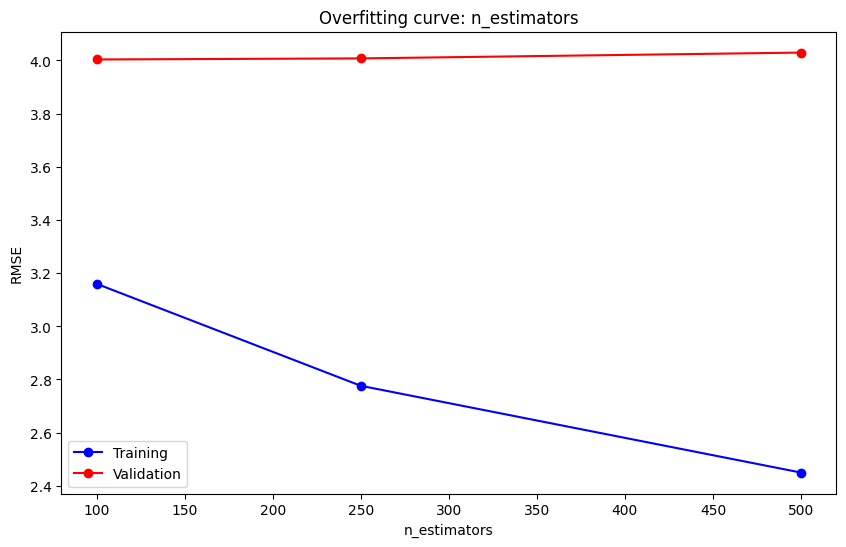

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [ ]:
best_params['n_estimators']=250

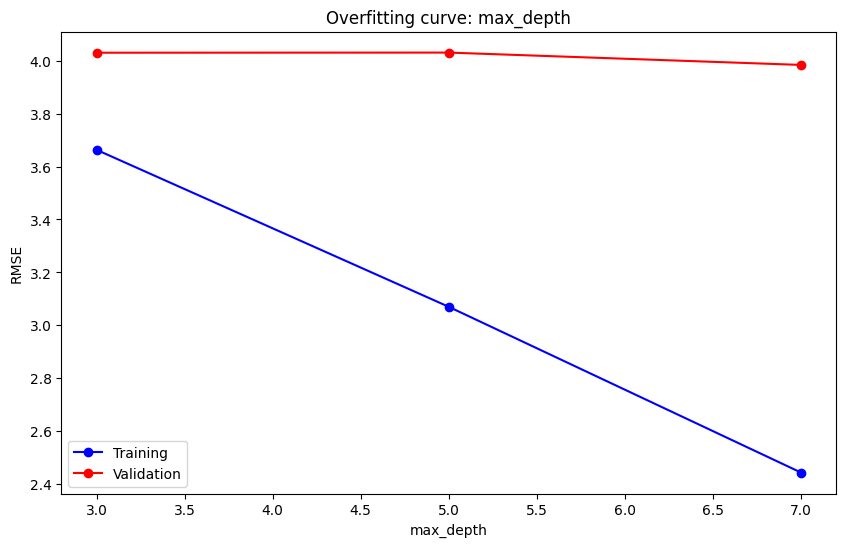

In [ ]:
test_param_and_plot(XGBRegressor, 'max_depth', [3, 5, 7], **best_params)

In [ ]:
best_params['max_depth']=7

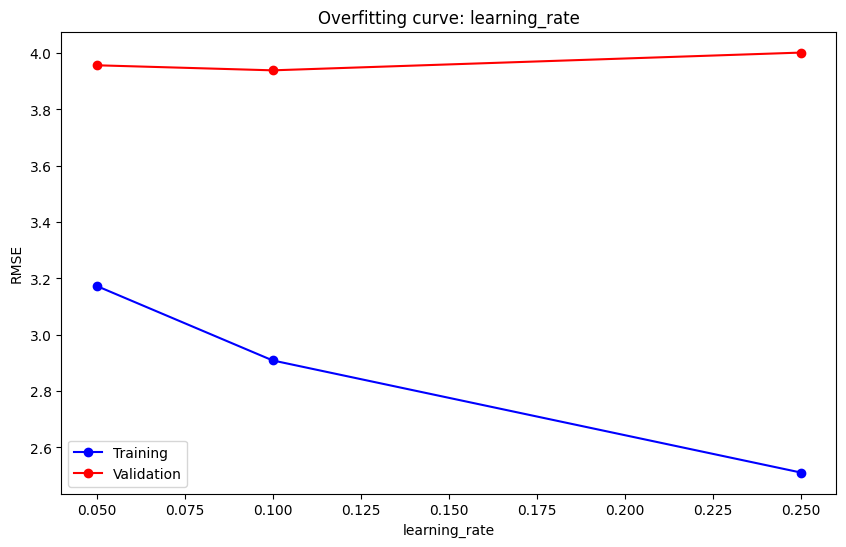

In [ ]:
test_param_and_plot(XGBRegressor, 'learning_rate', [.05,.1,.25], **best_params)

In [ ]:
best_params['learning_rate']=0.1


In [ ]:
xgb_model_final=XGBRegressor(objective='reg:squarederror',n_jobs=-1,random_state=42,learning_rate=.08,subsample=.7,colsample_bytree=.7,n_estimators=500,max_depth=8)

In [ ]:

xgb_model_final.fit(train_inputs,train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
evaluate(xgb_model_final)

(np.float64(2.463431895567962),
 np.float64(3.9465353099983744),
 array([ 6.832295 ,  5.9323077,  9.914385 , ..., 11.972894 ,  9.654705 ,
         9.897747 ], dtype=float32),
 array([15.199897 ,  5.555881 , 48.149788 , ...,  7.8623395, 31.837517 ,
         8.705139 ], dtype=float32))

In [ ]:
predict_and_submit(xgb_model_final,'xgb_tuned_submission.csv')

'xgb_tuned_submission.csv'